In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
import numpy as np

from scipy.stats import linregress

def plot_histogram(text, bins=20, w=4, h=2):
    
    author = '{} {}'.format(text.get('authorFirst'), text.get('authorLast'))
    print('{} ({}, {})'.format(text['title'], author, text['year']))
    
    plt.figure(figsize=(w,h))
    plt.hist(text['offsets'], bins, (0,1))
    plt.show()

In [148]:
from lint_analysis.token_offsets import Dataset

ds = Dataset.from_local('had.json')

In [150]:
from numpy.random import multinomial

def sample_series(series, n=1000, *args, **kwargs):
    return multinomial(series.sum(), series/series.sum(), n)

In [151]:
from scipy import stats

def first_bin_zscore(text, bins=20):

    y, _, _, _ = stats.histogram(text['offsets'], bins, (0, 1))

    expected = y.sum() / len(y)
    samples = sample_series(np.full(len(y), expected))

    avg_std = samples.std(1).mean()

    return (y[0]-expected)/avg_std

In [154]:
data = []
for text in ds.texts():
    zscore = first_bin_zscore(text)
    data.append((zscore, text['year'], text))

In [155]:
import pandas as pd

df = pd.DataFrame(data, columns=('zscore', 'year', 'text'))

In [156]:
df.sort_values('zscore', ascending=False)

,zscore,year,text
14340,23.340285,1991,"{'corpus': 'chicago', 'identifier': '23727', '..."
10286,15.860187,1895,"{'corpus': 'gale', 'identifier': 'AMFCF0002-C0..."
18609,15.731549,1966,"{'corpus': 'chicago', 'identifier': '20679', '..."
1,15.309358,1941,"{'corpus': 'chicago', 'identifier': '10639', '..."
10656,14.285622,1899,"{'corpus': 'gale', 'identifier': 'AMFCF0002-C0..."
2292,13.925341,1994,"{'corpus': 'chicago', 'identifier': '25492', '..."
6436,13.814775,1917,"{'corpus': 'gale', 'identifier': 'AMFCF0003-C0..."
11105,13.710017,1954,"{'corpus': 'chicago', 'identifier': '20139', '..."
16541,13.209593,1945,"{'corpus': 'chicago', 'identifier': '11765', '..."
10062,13.127559,1989,"{'corpus': 'chicago', 'identifier': '23211', '..."


In [157]:
X = df['year']
y = df['zscore']

X = sm.add_constant(X)
fit = sm.OLS(y, X).fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 zscore   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     794.5
Date:                Fri, 28 Apr 2017   Prob (F-statistic):          2.68e-172
Time:                        13:49:12   Log-Likelihood:                -59945.
No. Observations:               26971   AIC:                         1.199e+05
Df Residuals:                   26969   BIC:                         1.199e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.8519      0.569    -27.856      0.000     -16.967     -14.736
year           0.0084      0.000     28.187      0.000       0.008       0.009
==============================================================================
Omnibus:                     3506.328   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7795.719
Skew:                           0.783   Prob(JB):                         0.00
Kurtosis:                       5.118   Cond. No.                     8.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

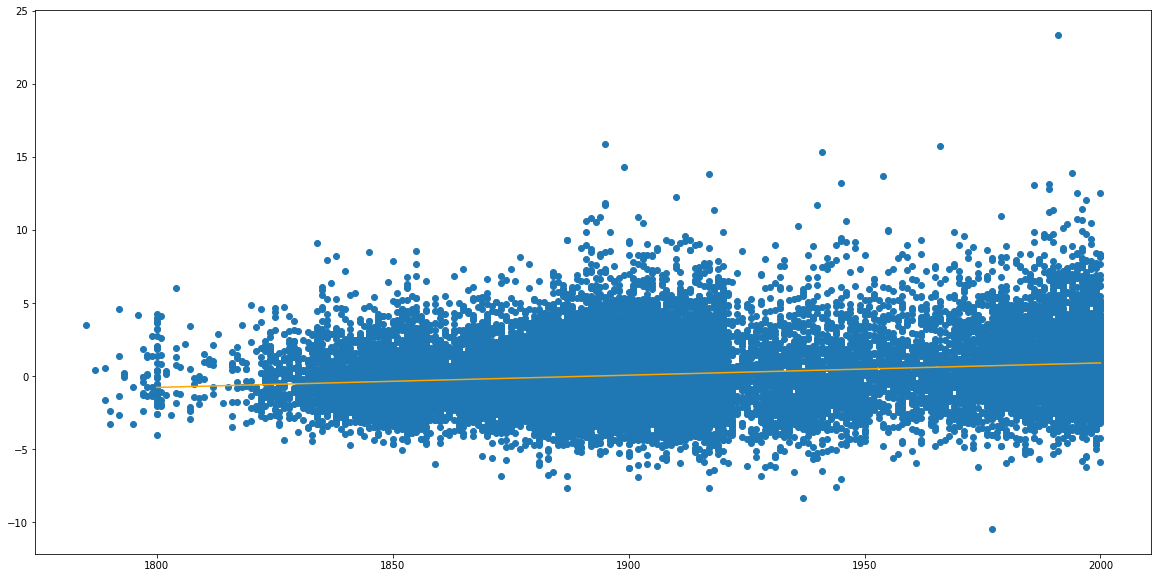

In [158]:
plt.figure(figsize=(20, 10))
plt.scatter(df['year'], df['zscore'])

x1 = 1800
x2 = 2000
y1 = fit.params[1]*x1 + fit.params[0]
y2 = fit.params[1]*x2 + fit.params[0]

plt.plot([x1, x2], [y1, y2], c='orange')

plt.show()

Beyond deserving (Sandra Jean Scofield, 1991)


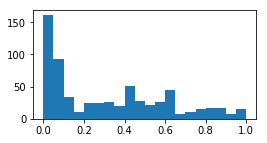

The Banker and the Typewriter: Nevada McNeill (Nevada McNeill, 1895)


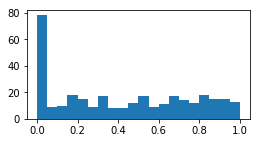

Tai-Pan (James Clavell, 1966)


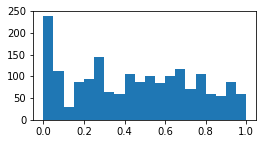

In this our life (Ellen Anderson Gholson Glasgow, 1941)


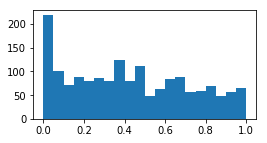

Love and Politics: A Social Romance of a Prominent Orator and a Society Queen: Reproductions of Their Letters and Poems: By Neile Bevans (Nelie Bevans, 1899)


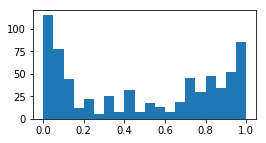

Grand passion (Jayne Castle, 1994)


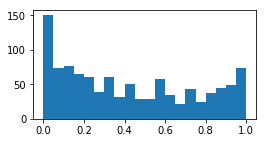

His Family: By Ernest Poole (Ernest Poole, 1917)


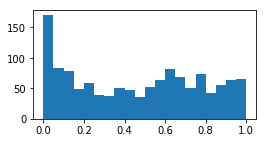

The star beast (Robert A. Heinlein, 1954)


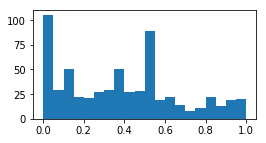

Sparkling cyanide (Agatha Christie, 1945)


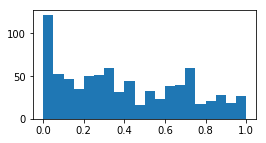

Kiss of the night wind (Janelle Taylor, 1989)


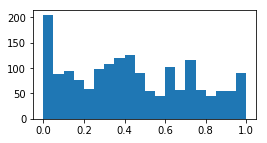

The seventh secret (Irving Wallace, 1986)


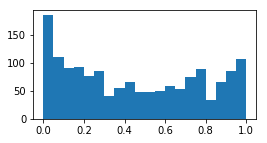

The education of Harriet Hatfield (May Sarton, 1989)


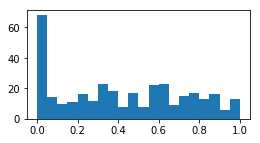

Lasher (Anne Rice, 1995)


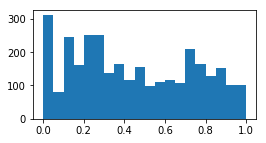

After the parade (Dorothy Garlock, 2000)


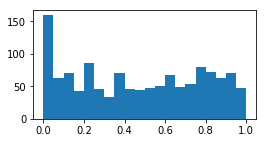

Lost Face (Jack London, 1910)


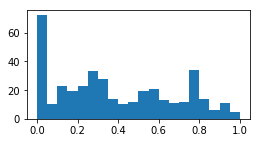

The shadow matrix (Marion Zimmer Bradley, 1997)


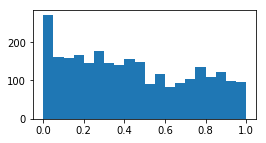

The Red Badge of Courage: An Episode of the American Civil War: By Stephen Crane (Stephen Crane, 1895)


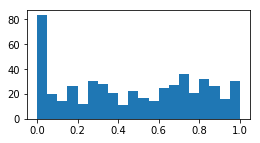

And then there were none (Agatha Christie, 1940)


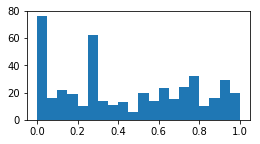

The red badge of courage (Stephen Crane, 1895)


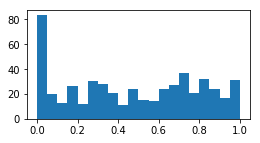

House of smoke (J. F Freedman, 1996)


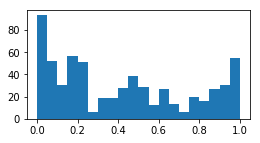

Always and forever (Cynthia Freeman, 1990)


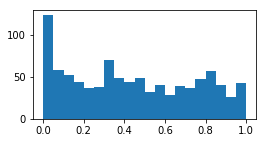

The Red One: By Jack London (Jack London, 1918)


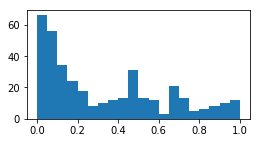

So worthy my love (Kathleen E Woodiwiss, 1989)


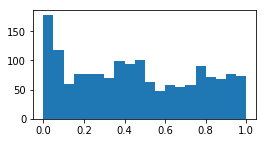

The dancers of Arun (Elizabeth A Lynn, 1979)


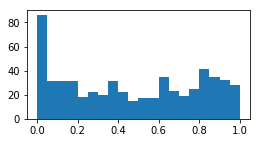

The Free Soil Prophet of the Verdigris: By R. E. Heller … (Robley Heller, 1894)


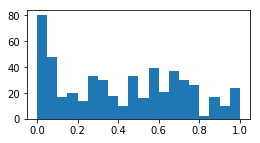

The Surprises of an Empty Hotel: A Novel: By Archibald Clavering Gunter (Archibald Gunter, 1902)


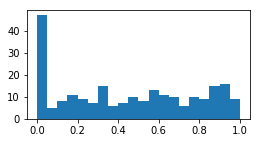

The Heirs of Bradley House: By Amanda M. Douglas … (Amanda Douglas, 1892)


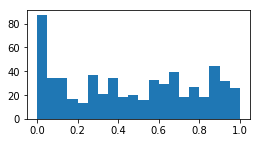

Topping from below (Laura Reese, 1995)


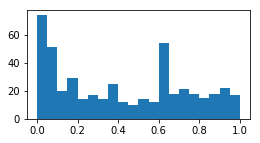

The Stainless Steel Rat goes to hell (Harry Harrison, 1996)


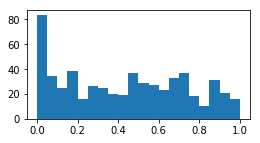

Return to Jalna (Mazo De la Roche, 1946)


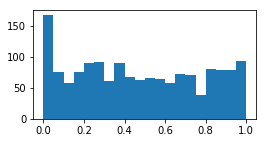

The Man from Mars: His Morals, Politics and Religion: By Thomas Blot (Thomas Blot, 1891)


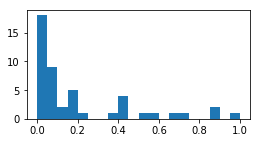

Earth Revisited: By Byron A. Brooks (Byron Brooks, 1893)


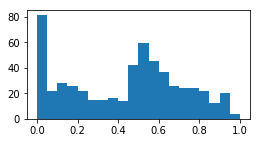

Dinosaur summer (Greg Bear, 1998)


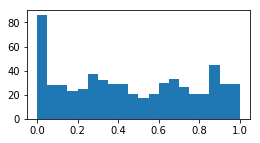

The untilled field (George Moore, 1903)


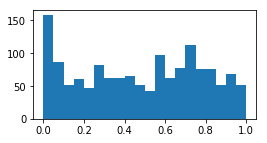

The robin & the kestrel (Mercedes Lackey, 1993)


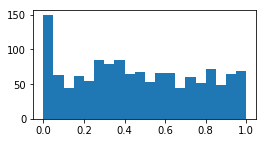

Nightwood (Djuna Barnes, 1936)


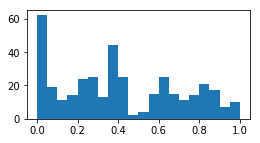

Wildest dreams (Jennifer Blake, 1992)


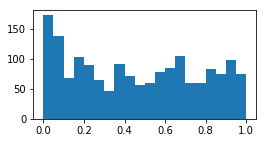

Ten North Frederick (John O'Hara, 1955)


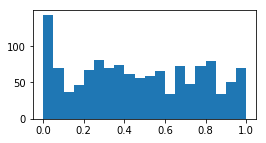

The recognitions (William Gaddis, 1955)


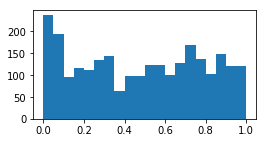

The enchantment of Lily Dahl (Siri Hustvedt, 1996)


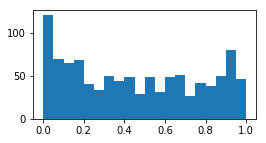

The unwilling heiress (Deborah Fruchey, 1986)


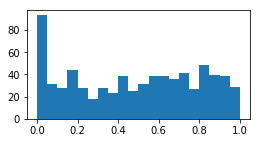

New moon rising (Eugenia Price, 1969)


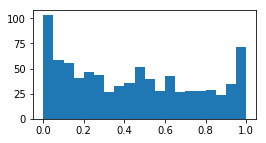

Her Senator: A Novel: By Archibald Clavering Gunter … (Archibald Gunter, 1896)


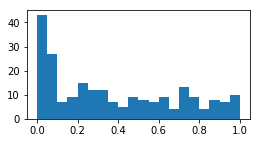

A Change of Opinion: By John Rupert Farrell (John Farrell, 1920)


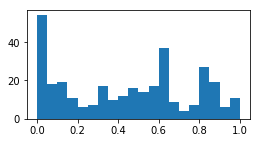

Juggernaut: A Veiled Record: By George Cary Eggleston and Dolores Marbourg (George Eggleston, 1891)


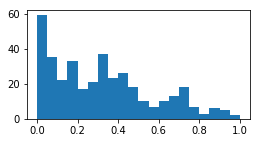

The missing Madonna (Carol Anne O'Marie, 1988)


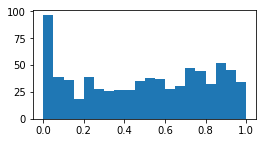

Power of a woman (Barbara Taylor Bradford, 1997)


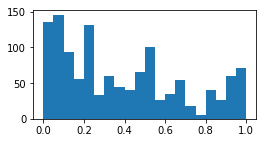

The witching hour (Anne Rice, 1990)


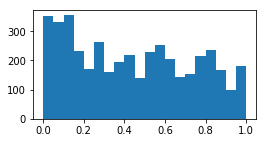

Death of the fox (George Garrett, 1971)


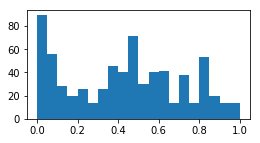

The Valiants of Virginia: By Hallie Erminie Rives (Mrs. Post Wheeler); Illustrated by André Castaigne (Hallie Rives, 1912)


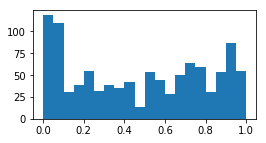

The black chamber (David Chacko, 1988)


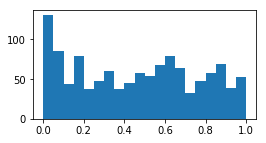

The old silent (Martha Grimes, 1989)


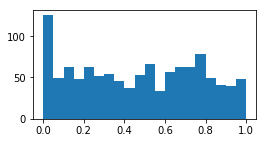

Knife in my back (Sam Merwin, 1945)


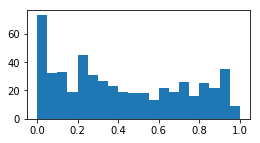

Secret star (Nora Roberts, 1998)


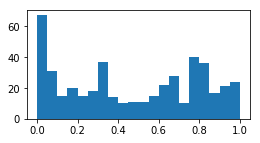

At Anchor: A Novel: Julia Magruder (Julia Magruder, 1887)


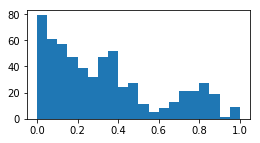

Calamity Jane: A Story of the Black Hills: By Mrs. George E. Spencer … (George Spencer, 1887)


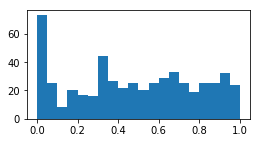

Damaged Goods: The Great Play "Les Avarie´S" of Brieux: Novelized with the Approval of the Author by Upton Sinclair (Upton Sinclair, 1913)


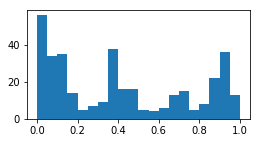

The prize (Irving Wallace, 1962)


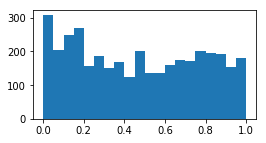

Folcarinia: A Political Love Story: By Adam Dixon Warner… (Adam Warner, 1908)


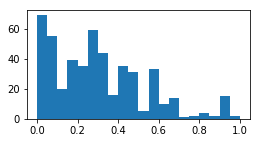

The Sledge: By R. V. Risley (Richard Risley, 1900)


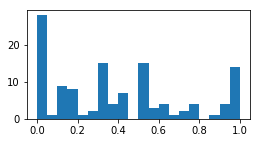

The Valiants of Virginia (Hallie Erminie Rives, 1912)


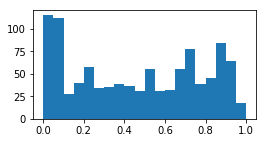

I: said the fly (Morna Doris MacTaggart, 1945)


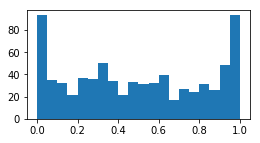

Dark hero (Peter Cheyney, 1946)


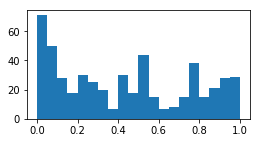

Children of light (Robert Stone, 1986)


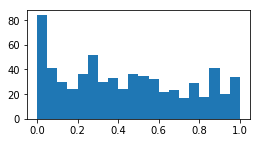

Spanish serenade (Jennifer Blake, 1990)


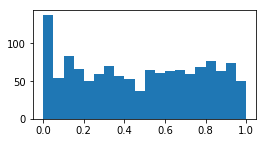

Final blackout (L. Ron Hubbard, 1948)


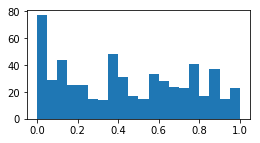

The Soul of the World: By Estella Bachman (Estella Bachman, 1909)


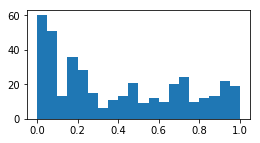

Joyce of the Jasmines: By Ralph Henry Barbour … with Illustrations in Color by Clarence F. Underwood and Decorations by Edward Stratton Holloway (Ralph Barbour, 1911)


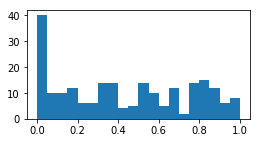

San Isidro: By Mrs. Schuyler Crowninshield (Schuyler Crowninshield, 1900)


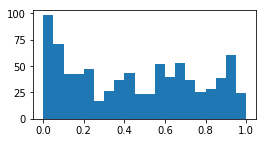

The Atlantic Club-Book: Being Sketches in Prose and Verse: By Various Authors (None None, 1834)


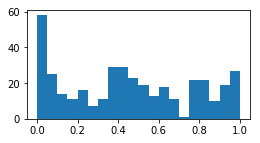

Long Draws: A Short Story of the Day: By W. M. Preston (William Preston, 1904)


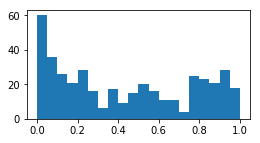

The House of Gladness: By Emma S. Allen (Emma Allen, 1915)


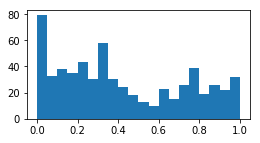

Ashes on the wind (John Fischer, 1998)


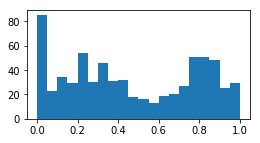

The lodger (Marie Belloc Lowndes, 1931)


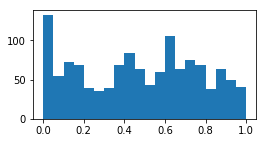

Ripley under ground (Patricia Highsmith, 1970)


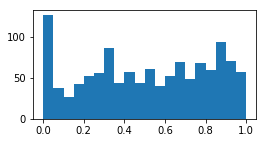

Dear and glorious physician (Taylor Caldwell, 1959)


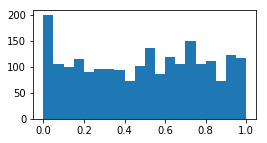

According to St. John: By Amélie Rives … (Amélie Rives, 1891)


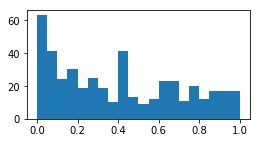

Escape the night (Mignon Good Eberhart, 1944)


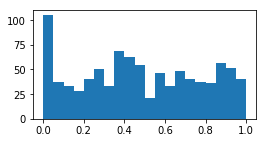

The Encounter: By Anne Douglas Sedgwick (Mrs. Basil De Sélincourt) (Anne Sedgwick, 1914)


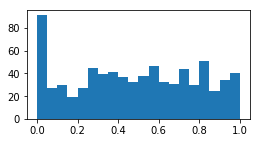

The love talker (Barbara Mertz, 1980)


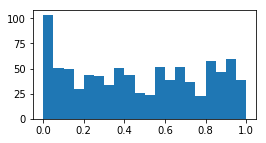

This time a better earth (Ted Allan, 1939)


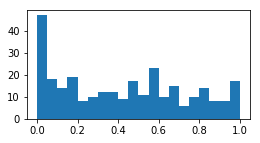

Hollywood kids (Jackie Collins, 1994)


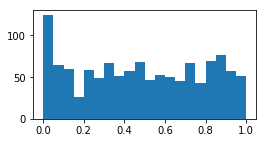

Small changes (Marge Piercy, 1973)


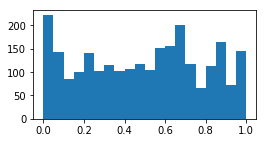

A.D. 2050: Electrical Development at Atlantis: By a Former Resident of "The Hub." (John Bachelder, 1890)


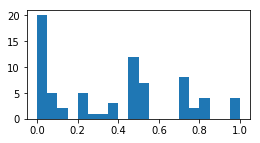

Consider the Lilies: By Clara Froelich Grindell...; Illustrations by Ida W. Prentice (Clara Grindell, 1906)


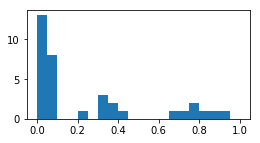

The Golden Heart: By Ralph Henry Barbour... With Illustrations in Color by Clarence F. Underwood and Decorations by Edward Stratton Holloway (Ralph Barbour, 1910)


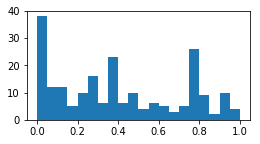

Mexico (James A. Michener, 1992)


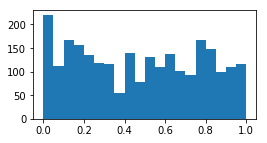

Walden Two (B. F. Skinner, 1948)


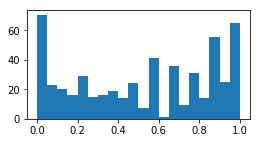

Charred Wood: By Myles Muredach; Illustrated by J. Clinton Shepherd (Francis Kelley, 1917)


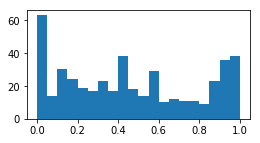

The deep end of the ocean (Jacquelyn Mitchard, 1996)


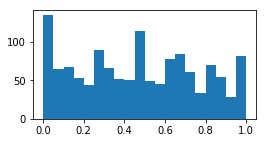

Born of Flame: A Rosicrucian Story: By Mrs. Margaret B. Peeke … (Margaret Peeke, 1892)


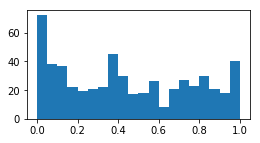

Anvil of stars (Greg Bear, 1992)


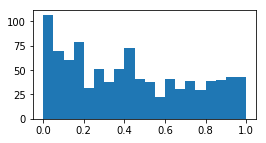

Woman on the edge of time (Marge Piercy, 1976)


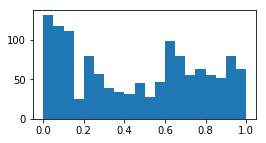

The Treasure of Peyre Gaillard: Being an Account of the Recovery, on a South Carolina Plantation, of a Treasure, Which Had Remained Buried and Lost in a Vast Swamp for over a Hundred Years: Arranged by John Bennett, after the Ms. Narrative by Buck Guignard, esq., in the French manuscript entitled "Le monticule du Jude." (John Bennett, 1906)


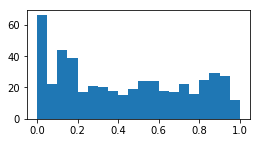

The Shadow: By Arthur Stringer (Arthur Stringer, 1913)


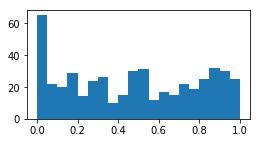

A Forest Idyl: By Temple Oliver (Jeanie Smith, 1913)


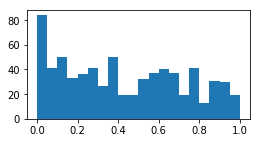

The Heiress of Bellefonte: Emerson Bennett (Emerson Bennett, 1855)


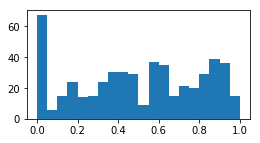

Colonel [a Novel]: By Laisdell Mitchell … (Laisdell Mitchell, 1896)


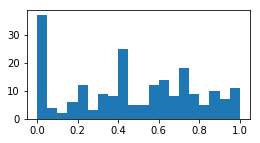

Never-fail Blake (Arthur Stringer, 1924)


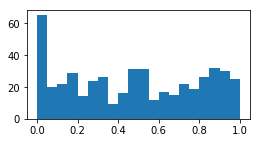

The Hellfire Club (Peter Straub, 1996)


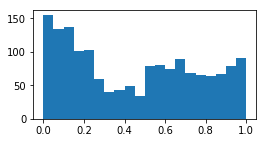

In [160]:
for text in df.sort_values('zscore', ascending=False)['text'].head(100):
    plot_histogram(text)